# **DSE200 - MiniProject - Starbucks Analysis**
- Date: 2025 November 7
- Authors:
  - Phong Le
  - Jake Ramirez

#### Instructions:
- `<Ctrl-Enter>`: Run current focused cell.
- `<Shift-Enter>`: Run current focused cell, then shift focus to the next one.
- `<Ctrl/Cmd-F9>`: Run all cells in notebook.

In [19]:
%pip install numpy pandas matplotlib seaborn scipy scikit-learn kagglehub

In [20]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
# Download latest version
path = kagglehub.dataset_download("ihormuliar/starbucks-customer-data")

print("Path to dataset files:", path)

# portfolio.csv
portfolio_df = pd.read_csv(path + "/portfolio.csv")

# profile.csv
profile_df = pd.read_csv(path + "/profile.csv")

# transcript.csv
transcript_df = pd.read_csv(path + "/transcript.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/ihormuliar/starbucks-customer-data/versions/1


In [22]:
portfolio_df.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [23]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [24]:
transcript_df.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


Section 1: Symbolic Data Analysis (SDA) & Summaries

In [25]:
# --- Profile Data Overview ---
# Describe and summarize
print(profile_df.describe())
print(profile_df.info())

# Check for Missing Values
print(profile_df.isna().any())

# Analysis Notes:
# NaN values detected in: ['gender', 'income']
# profile_df contains ~17,000 customers


         Unnamed: 0           age  became_member_on         income
count  17000.000000  17000.000000      1.700000e+04   14825.000000
mean    8499.500000     62.531412      2.016703e+07   65404.991568
std     4907.621624     26.738580      1.167750e+04   21598.299410
min        0.000000     18.000000      2.013073e+07   30000.000000
25%     4249.750000     45.000000      2.016053e+07   49000.000000
50%     8499.500000     58.000000      2.017080e+07   64000.000000
75%    12749.250000     73.000000      2.017123e+07   80000.000000
max    16999.000000    118.000000      2.018073e+07  120000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   be

In [26]:
# --- Portfolio Data Overview ---
# Describe and summarize
print(portfolio_df.describe())
print(portfolio_df.info())

# Check for Missing Values
print(portfolio_df.isna().any())

# Analysis Notes:
# No NaN values detected
# portfolio_df includes 10 offer types


       Unnamed: 0     reward  difficulty   duration
count    10.00000  10.000000   10.000000  10.000000
mean      4.50000   4.200000    7.700000   6.500000
std       3.02765   3.583915    5.831905   2.321398
min       0.00000   0.000000    0.000000   3.000000
25%       2.25000   2.000000    5.000000   5.000000
50%       4.50000   4.000000    8.500000   7.000000
75%       6.75000   5.000000   10.000000   7.000000
max       9.00000  10.000000   20.000000  10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes
None
Unnamed: 0 

In [27]:
# --- Transcript Data Overview ---
# Describe and summarize
print(transcript_df.describe())
print(transcript_df.info())

# Check for Missing Values
print(transcript_df.isna().any())

# Analysis Notes:
# No NaN values detected
# transcript_df contains 306,534 transactions


          Unnamed: 0           time
count  306534.000000  306534.000000
mean   153266.500000     366.382940
std     88488.888045     200.326314
min         0.000000       0.000000
25%     76633.250000     186.000000
50%    153266.500000     408.000000
75%    229899.750000     528.000000
max    306533.000000     714.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB
None
Unnamed: 0    False
person        False
event         False
value         False
time          False
dtype: bool


Section 2: Data Pre-processing

In [28]:
# --- Clean Profile Data ---
# Remove rows with missing values in 'gender' or 'income'
profile_df_clean = profile_df.dropna(subset=['gender', 'income'])

print("Dirty (original):", len(profile_df))
print("Clean (processed):", len(profile_df_clean))

# --- Standardize Date/Time Values ---
# Convert 'became_member_on' to datetime format
profile_df_clean = profile_df_clean.copy()
profile_df_clean['became_member_on'] = pd.to_datetime(
    profile_df_clean['became_member_on'], format='%Y%m%d'
)

# --- Extract Transaction Amounts ---
transcript_df_clean = transcript_df.copy()
# For event type 'transaction', return only the numeric 'amount' value
mask = transcript_df_clean['event'] == 'transaction'
transcript_df_clean.loc[mask, 'value'] = (
    transcript_df_clean.loc[mask, 'value']
    .apply(lambda x: x.get('amount') if isinstance(x, dict) else x)
)


Dirty (original): 17000
Clean (processed): 14825


In [29]:
# --- Clean and Format Transaction Data ---
import ast

# Create a copy to avoid modifying the original DataFrame
transcript_df_clean = transcript_df.copy()

# Only modify rows where event == 'transaction'
mask = transcript_df_clean['event'] == 'transaction'

# Extract and format 'amount' to two decimal places
transcript_df_clean.loc[mask, 'value'] = (
    transcript_df_clean.loc[mask, 'value']
    .apply(lambda s: float(ast.literal_eval(s)['amount']) if isinstance(s, str) else s)
    .round(2)
)

# Preview cleaned transaction records
transcript_df_clean[transcript_df_clean['event'] == 'transaction'].head()


,Unnamed: 0,person,event,value,time
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,0.83,0
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0
12659,12659,54890f68699049c2a04d415abc25e717,transaction,13.23,0
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0
12671,12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0


In [ ]:
# --- Simplify Offer ID Extraction ---
# Parse data to extract offer events using punctuation/RegEx style patterns.
# E.g.: Reformat the key:value {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'} into just the string value '9b98b8c7a33c4b65b9aebfe6a799e6d9'
import ast

transcript_df_clean = transcript_df.copy()
offer_events = ['offer received', 'offer viewed', 'offer completed', 'offer recieved']

mask = transcript_df_clean['event'].isin(offer_events)

transcript_df_clean.loc[mask, 'value'] = (
    transcript_df_clean.loc[mask, 'value']
    .apply(lambda x: ast.literal_eval(x).get('offer id') if isinstance(x, str) else x)
)

# Preview
transcript_df_clean.loc[mask, ['event', 'value']].head()


,event,value
0,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,2906b810c7d4411798c6938adc9daaa5
3,offer received,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0


Section 3: Exploratory Data Analysis (EDA)


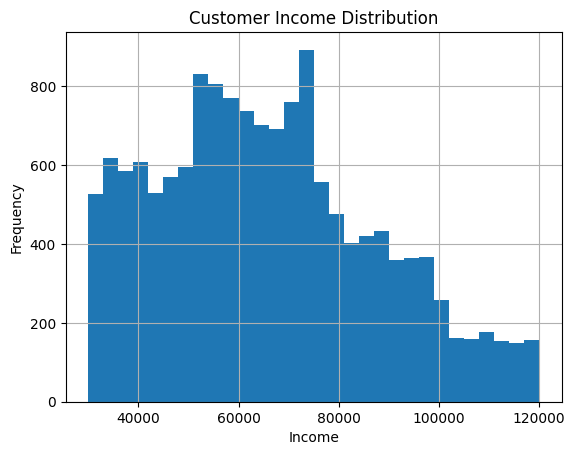

Gender distribution:
 gender
M    8484
F    6129
O     212
Name: count, dtype: int64


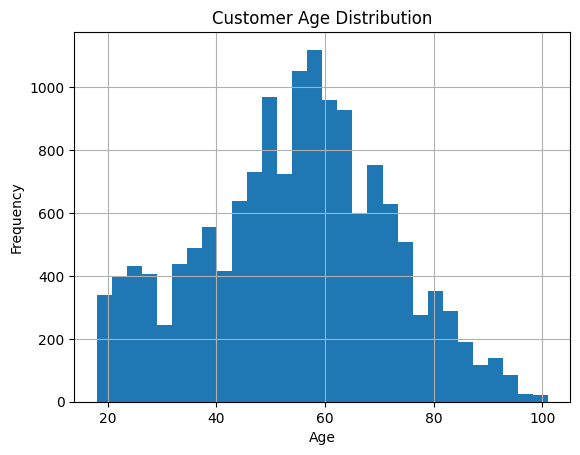

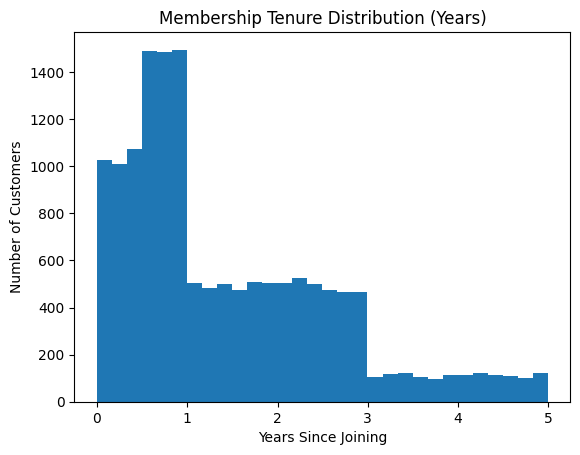

In [31]:
# --- Distribution Visuals ---
import matplotlib.pyplot as plt
profile_df_clean['income'].hist(bins=30)
plt.title("Customer Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# --- Gender Counts ---
gender_counts = profile_df_clean['gender'].value_counts()
print("Gender distribution:\n", gender_counts)

# --- Age Distribution ---
profile_df_clean['age'].hist(bins=30)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# --- Membership Tenure ---
if 'became_member_on' in profile_df_clean.columns:
    tenure_years = (profile_df_clean['became_member_on'].max() - profile_df_clean['became_member_on']).dt.days / 365
    plt.hist(tenure_years, bins=30)
    plt.title("Membership Tenure Distribution (Years)")
    plt.xlabel("Years Since Joining")
    plt.ylabel("Number of Customers")
    plt.show()


In [32]:
# --- Promotion Funnel Progress ---
# Group rows by person and value to view offer journey (received → viewed → completed)
transcript_df_sorted = transcript_df_clean.sort_values(by=['person', 'value'])

# Remove 'transaction' events to focus on offer flow
transcript_df_sorted = transcript_df_sorted[transcript_df_sorted['event'] != 'transaction']

# Display grouped offer progression
transcript_df_sorted.head()


,Unnamed: 0,person,event,value,time
247879,247879,0009655768c64bdeb2e877511632db8f,offer received,2906b810c7d4411798c6938adc9daaa5,576
113605,113605,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336
139992,139992,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372
55972,55972,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168
77705,77705,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192


Section 4: Advanced Analytics


In [ ]:
# --- General Statistical Summary ---
# E.g. Executive summary style numbers for less/non-technical personnel to use in metrics/sales.
print("There are",transcript_df_sorted['person'].nunique(), "unique customers in the dataset")
print("There are",len(transcript_df_sorted),"records in the dataset")

In [ ]:
# Set Up Custom Framework for Analysis
# Add offer types for easy data classification and processing
# --- Offer Types ---
# B1G1, Direct discount, No monetary reward (PSA/Info message)

from enum import Enum

class OfferType(Enum):
    BOGO = "bogo"
                     # Buy-One-Get-One offer
    DISCOUNT = "discount"         # Direct discount on purchase
    INFORMATIONAL = "informational"  # Informational message (no monetary reward)


People can complete some offers and not other offers.  THerefore, cannot split people into 'completed' and 'not completed'.

Need to create a Person-Campaign dataframe

In [ ]:
# --- Create Person-Campaign Funnel View ---
# Description: Create Person-Campaign Data Structure for Improved Data Organization/Curation
# Pivot events (received, viewed, completed) by person and offer to visualize promotion progress
person_campaign_df = transcript_df_sorted.copy()

# Create binary flag for each event occurrence
person_campaign_df['flag'] = 1

# Pivot to show each event as a separate column
# Note: Mark events as `1` (aggfunc) and fill missing values with `0` (fill_value)
person_campaign_df = (
    person_campaign_df.pivot_table(
        index=['person', 'value'],
        columns='event',
        values='flag',
        aggfunc='max',    # mark event as 1 if it occurred
        fill_value=0
    )
    .reset_index()
)

person_campaign_df.head()

What person or campaign attributes increase likelihood of completion?

Approach:  Supervised classification
Target variable = 'offer completed' (0 or 1)
Features: person attributes + campaign attributes
Models:  Logistic Regression or Random Forest

In [ ]:
# Merge person and campaign attributes
df_model = person_campaign_df.merge(profile_df_clean, left_on='person', right_on='id', how='left')
df_model = df_model.merge(portfolio_df, left_on='value', right_on='id', how='left')

# Drop redundant id columns
df_model.drop(columns=['id_x', 'id_y', 'Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)

df_model.head()

# Model Training and Evaluation

In [ ]:
# --- Feature Selection & Encoding ---
# Select input features (X) and target variable (y)
X = df_model.drop(columns=['offer completed', 'person', 'value'])
y = df_model['offer completed']

# Convert categorical columns to numeric
X = pd.get_dummies(X, columns=['gender', 'offer_type'])

# Convert 'became_member_on' to numerical (days since earliest join date)
X['became_member_on'] = (X['became_member_on'] - X['became_member_on'].min()).dt.days

# Count number of channels per offer
X['channels_count'] = (
    X['channels']
    .str.strip('[]')
    .str.replace("'", "")
    .str.split(', ')
    .apply(len)
)

# Drop original channels column
X = X.drop(columns=['channels'])

## Random Forest Model

In [ ]:
# --- Train Classification Model (Random Forest) ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


### Feature Importance

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance.head(20))

feature_importance.head(20).plot(kind='barh')
plt.show()

## Linear Regression Model

In [ ]:
# --- Simple Linear Regression Analysis ---
# Predict customer income based on age and membership duration

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = profile_df_clean[['age']]
X['membership_days'] = (profile_df_clean['became_member_on'].max() - profile_df_clean['became_member_on']).dt.days
y = profile_df_clean['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 3))

### Display Linear Regression Data

In [ ]:

# Display coefficients and plot(s)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Linear Regression: Actual vs Predicted Income")
plt.show()


Section 5: Business Insights & Recommendations


In this section, we will analyze current promotional strategies, evaluate offer success rates across customer populations. Finally, we will provide targeted recommendations to maximize marketing effectiveness and overall Starbucks business improvement.

## Observations:

### Key predictors

- The top three (3) predictors for offer completion are:

1. Age
2. Income
3. Days of membership

- Campaign details
1. Informational Offer Type
2. Duration
3. Difficulty
4. Reward

## Summary

The strongest predictors of offer completion are age, income, and days of membership. Younger users lean toward quick and digital offers, higher-income users respond better to premium or exclusive rewards, and long-time members stay engaged when they’re recognized or re-incentivized over time. Campaign results also hinge on offer type, duration, difficulty, and reward clarity, where straightforward, time-bound, and reward-based promotions consistently outperform longer or purely informational ones.


### Recommendations

#### Targeting & Personalization
- **Demographic Targeting:**
  - Working-age (25–55): convenience, app-based, and time-limited rewards.
  - Students (18–25): affordable bundles, ad-supported deals.
  - Seniors (55+): simple redemptions and recurring loyalty perks.
- **Income Segmentation:**
  - Lower-income: value-driven (discounts, combos, ad-tier incentives).
  - Higher-income: exclusivity (premium experiences, invitation events).

#### Membership Retention
- Add **milestone rewards** to maintain engagement:
  - 60 days → small perk
  - 120 days → bonus points
  - 1 year+ → anniversary or tier-based benefits
- Track **activity** (visits, spend, referrals) alongside membership duration for stronger insights.


### Advanced and Exploratory Ideas

#### Data Integrity & Model Maintenance
- Keep one clean database with current user info, behavior, and activity.
- Update and retrain models every few months to stay accurate.

#### Additional Insights & Actions
- Test & Adjust Offers:** Experiment with and fine-tune different rewards, difficulties, and time lengths
- Observe regional data and trends: look for high-response areas and heat maps.
- Track groups: follow users by signup date to see seasonal/recurring temporal patterns.

Presentation Outline

Project Objectives

Possible Analysis Directions
Offer Performance Analysis

Which types of offers are most successful?
How does offer success vary across different customer segments?
What is the optimal duration for different types of offers?
Customer Segmentation

Can we identify distinct customer groups based on their response to offers?
How do demographics influence offer effectiveness?
Which customer segments are most valuable to target?
Channel Effectiveness

Which communication channels are most effective for different customer segments?
Does multi-channel marketing improve offer success?
Customer Behavior Patterns

What is the typical customer journey from receiving to completing an offer?
Are there patterns in transaction behavior with and without offers?
How does membership tenure relate to offer response?
Technical Requirements
Your analysis should include:

Data Cleaning & Preprocessing

Handle missing values
Convert data types appropriately
Create relevant features for analysis
Exploratory Data Analysis

Visualize key patterns and relationships
Identify significant trends
Support findings with statistical analysis
Advanced Analytics (choose at least one)

Customer Segmentation (e.g., clustering)
Offer Success Prediction
Customer Response Modeling
Promotional Impact Analysis
Business Recommendations

Clear, actionable insights
Data-driven recommendations
Potential impact assessment